![](https://drive.google.com/uc?id=1-KqvmRic4EEYrDblHAwY0cne0__2OSsh)
# AI0: The Basics of Data Science
## Homework 2: Pandas and Numpy

**Univ.AI**<br/>

<hr style="height:2.4pt">

### INSTRUCTIONS

- This homework is a jupyter notebook. You can work on it on the platform (recommended) or download it to your local machine and upload a copy without deleting the **### edTest ###** cells.
- Remember to hit the `Save` button each time you edit this file to avoid losing any progress.
- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Use the `Run all` button.
- If you choose to download the notebook and work locally, please make sure to retain the same file name when submitting it. To submit the homework, upload the working notebook on the platform and click the `Submit` button on the top right corner. The platform will alert you of a new file with the same name. Click `Overwrite` to continue with your new version.
- `Submit` the homework well before the given deadline. Submissions after the deadline will not be graded.
- We have tried to include all the libraries you may need to do the assignment in the `import` statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- <i><b>Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code.</b></i>

<hr style="height:2pt">


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **PART 1 [30 points]: Inspect, clean and transform the data**

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In part 1, you will:
1. Inspect the dataset.
2. Clean by removing `NaN` entries.
3. Check for skewness in data.
4. Correct the skewness in data.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.1 Reading data [2 points]**
We will use `numpy` and `pandas` for data manipulation throughout.

### **Instructions**

- Read in 'movie_raw.csv' with pandas and assign it to a new dataframe, df.
- Call `df.head()` to take a look at the data.

In [1]:
### edTest(test_df) ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv('movie_raw.csv')

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.2 Creating targets [3 points]**

In this exercise, we will define the regression and classification outcomes. Specifically, we will use the `revenue` column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

### **Instructions**
- Create a new column in `df` called `profitable`, defined as 1 if the movie `revenue` is greater than the movie `budget`, and 0 otherwise.

**Hint:** Try using a lambda function or np.where. Don't forget about boolean vector masks!



In [2]:
### edTest(test_dfnew) ###
# your code here
df['profitable'] = np.where(df['revenue'] > df['budget'], 1, 0)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

- Next, define and store the outcomes we will use for regression and classification.
    - Define `regression_target` as the string `'revenue'`.
    - Define `classification_target` as the string `'profitable'`.

In [3]:
### edTest(test_target) ###
# your code here
regression_target = 'revenue'
classification_target = 'profitable'

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.3 Cleaning data [5 points]**

For simplicity, we will proceed by analyzing only the rows without any missing data. In this exercise, we will remove rows with any infinite or missing values.

### **Instructions**

- Use `df.replace()` to replace any cells with type `np.inf` or `-np.inf` with `np.nan`.
Here is the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html">documentation </a> for this function.
- Drop all rows with any `np.nan` values in that row using `df.dropna()`. <br>

**Note:** Set the `inplace` parameter to `True` when using the `replace()` and `dropna()` functions to ensure that the changes are made directly to the original DataFrame. If you set `inplace=False`, a newly modified DataFrame will be returned, and you'll need to assign it to a new variable.

Do any further arguments need to be specified in this function to remove rows with any such values?

In [4]:
### edTest(test_clean) ###
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(len(df))

1406


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.4 Genre Processing[10 points]**

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

### **Instructions**
- Read about `pandas.Series.str.get_dummies` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get_dummies.html) and think of a way you can make a column for each genre.
- Each of these genre columns should have 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind, a movie may belong to several genres at once.
- Make a list of `unique_genres` using the dataframe returned by `str.get_dummies`
- You can use `pandas.DataFrame.join` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)) to join the dataframe returned by `str.get_dummies` to the orginal dataframe.

In [5]:
### edTest(test_genre) ###
#your code here
genre_dummies = df['genres'].str.get_dummies(sep=', ')
unique_genres = genre_dummies.columns.tolist()
df = df.join(genre_dummies)

In [6]:
#run this cell after assigining 'unique_genres'
df[unique_genres].head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.5 Skewness**

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In this exercise, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

### **Instructions**
- Call `plt.show()` to observe the plot below.
    - Which of the covariates and/or outcomes are correlated with each other?
- Call `skew()` on the columns `outcomes_and_continuous_features` in df.
    - Is the skew above 1 for any of these variables?

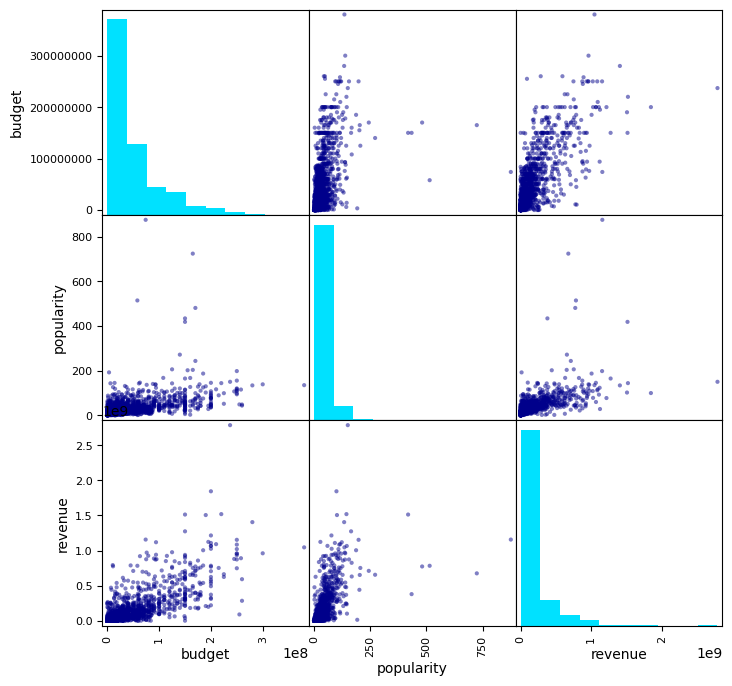

In [7]:
continuous_features = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_features = continuous_features + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.5, \
                                  color=(0,0,0), hist_kwds={"color":'#00e1ff'}, facecolor='darkblue', figsize=(8,8))
# show the plot:
plt.show()

In [8]:
# determine the skew:
skewness = df[outcomes_and_continuous_features].skew()
print("Skewness for variables:")
print(skewness)

Skewness for variables:
budget          1.754872
popularity      7.968139
runtime         1.059804
vote_count      2.461041
vote_average   -1.080038
revenue         3.084680
profitable     -1.081030
dtype: float64


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### ⏸ What kind of a skew do `revenue`, `popularity` and `budget` have? [1 mark]

#### A. left tailed
#### B. negative
#### C. right tailed
#### D. no skew
</div>


In [9]:
### edTest(test_chow) ###
# Submit an answer choice as a string below (eg. if you choose option A put 'A')

answer = 'C'

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.6 Fixing skew [5 points]**

It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all skewed.
Skewness of features or response variables is undesirable as it can violate the assumptions of a linear model.
Read this [blog](https://vivekrai1011.medium.com/skewness-and-kurtosis-in-machine-learning-c19f79e2d7a5) to understand skewness and common transformations used to handle skewed data.

In this exercise, we will transform these variables to eliminate this skewness using Log Transformation. <br>
We will use the `np.log10()` method and since some of these variable values are exactly 0, we will add a small positive value. This is essential to prevent values from becoming undefined, given that log(0) results in negative infinity.

### **Instructions**
- For each above-mentioned variable in `df`, transform value `x` into `np.log10(1+x)`.

In [10]:
### edTest(test_skew) ###
# Enter your code here.
skewed_variables = ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']
for variable in skewed_variables:
    df[variable] = np.log10(1 + df[variable])

Now run the cell below:

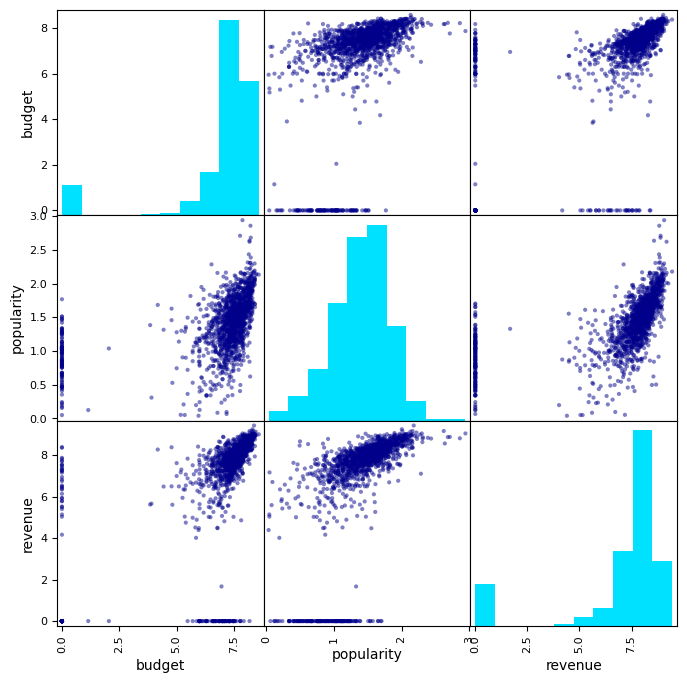

In [11]:
axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.5, \
                                  color=(0,0,0), hist_kwds={"color":'#00e1ff'}, facecolor='darkblue', figsize=(8,8))
# show the plot:
plt.show()

In [12]:
# determine the skew and print it out
skewness_after_transform = df[skewed_variables].skew()
print("Skewness after transformation:")
print(skewness_after_transform)

Skewness after transformation:
budget       -2.816990
popularity   -0.431543
runtime       0.530489
vote_count   -0.677632
revenue      -2.177372
dtype: float64


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

## **1.7 Save clean Dataset [4 points]**

Let's now save our dataset.

### **Instructions**
- Use `to_csv()` to save the `df` object as `movies_clean.csv`.

In [13]:
### edTest(test_csv) ###
# Enter your code here
# Save the DataFrame as a CSV file
df.to_csv('movies_clean.csv', index=False)
df_new = pd.read_csv('movies_clean.csv')